# Table of content

## EDA
1. [Problem statement and data collection](##1-problem-statement-and-data-collection)  
2. [Exploration and data cleaning](##2-Exploration-and-data-cleaning)
   - [2.1: Understanding the features](###21-Understanding-the-features)  
   - [2.2: Identifying null values](###22-Identifying-null-values)  
   - [2.3: Eliminating duplicate values](###23-Eliminating-duplicate-values)
   - [2.4: Eliminating variables](###24-Eliminating-variables)  

## Machine Learning
3. [Dataset split into train and test](###3-Dataset-split-into-train-and-test)
4. [K-Means](###4-K-Means)
5. [KNN](###5-KNN)
6. [Saving the model](###6-Saving-the-model)



-----------------------------------------------------------------------------------------------------------------

## EDA

## 1. Problem statement and data collection

In [41]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('display.max_columns', None)
sns.set(
    style="whitegrid",
    palette="pastel",
)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

In [42]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.0,6.98,1.02,322.0,2.56,37.88,-122.23,4.53
1,8.30,21.0,6.24,0.97,2401.0,2.11,37.86,-122.22,3.58
2,7.26,52.0,8.29,1.07,496.0,2.80,37.85,-122.24,3.52
3,5.64,52.0,5.82,1.07,558.0,2.55,37.85,-122.25,3.41
4,3.85,52.0,6.28,1.08,565.0,2.18,37.85,-122.25,3.42


## 2. Exploration and data cleaning

### 2.1 Understanding the features

We want to be able to classify houses according to their region and median income. To do this, we will use the famous California Housing dataset. It was constructed using data from the 1990 California census. It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.

We are only interested in the Latitude, Longitude and MedInc columns

In [43]:
total_data.shape

(20640, 9)

### 2.2 Identifying null values

In [44]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 2.3 Eliminating duplicate values

In [45]:
total_data.drop_duplicates()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.0,6.98,1.02,322.0,2.56,37.88,-122.23,4.53
1,8.30,21.0,6.24,0.97,2401.0,2.11,37.86,-122.22,3.58
2,7.26,52.0,8.29,1.07,496.0,2.80,37.85,-122.24,3.52
3,5.64,52.0,5.82,1.07,558.0,2.55,37.85,-122.25,3.41
4,3.85,52.0,6.28,1.08,565.0,2.18,37.85,-122.25,3.42
...,...,...,...,...,...,...,...,...,...
20635,1.56,25.0,5.05,1.13,845.0,2.56,39.48,-121.09,0.78
20636,2.56,18.0,6.11,1.32,356.0,3.12,39.49,-121.21,0.77
20637,1.70,17.0,5.21,1.12,1007.0,2.33,39.43,-121.22,0.92
20638,1.87,18.0,5.33,1.17,741.0,2.12,39.43,-121.32,0.85


### 2.4 Eliminating variables

In [46]:
total_data.drop(["HouseAge", "AveRooms", "AveBedrms","Population","AveOccup","MedHouseVal"], axis = 1, inplace = True)
total_data.head()

,MedInc,Latitude,Longitude
0,8.33,37.88,-122.23
1,8.30,37.86,-122.22
2,7.26,37.85,-122.24
3,5.64,37.85,-122.25
4,3.85,37.85,-122.25


## Machine Learning

### 3. Dataset split into train and test

In [47]:
features = ['MedInc', 'Latitude', 'Longitude']
df = total_data[features].dropna()

X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (16512, 3)
Test shape: (4128, 3)


### 4. K-Means

Classify the data into 6 clusters using the K-Means model. 

In [48]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 6, random_state = 42)
model.fit(df)

Y_test = model.predict(X_test)
Y_train = model.predict(X_train)

Store the cluster to which each house belongs as a new column in the dataset

In [49]:
total_data = df[features]


X_train['cluster'] = Y_train
X_test['cluster'] = Y_test

print(X_train['cluster'].value_counts())
print(X_train.head())

cluster
3    5232
1    3915
0    3345
2    2252
4    1339
5     429
Name: count, dtype: int64
       MedInc  Latitude  Longitude  cluster
14196    3.26     32.71    -117.03        3
8267     3.81     33.77    -118.16        3
17445    4.16     34.66    -120.48        4
14265    1.94     32.69    -117.11        3
2271     3.55     36.78    -119.80        4


Create a Scatterplot (Longitude, Latitude and cluster)

<Axes: xlabel='Longitude', ylabel='Latitude'>

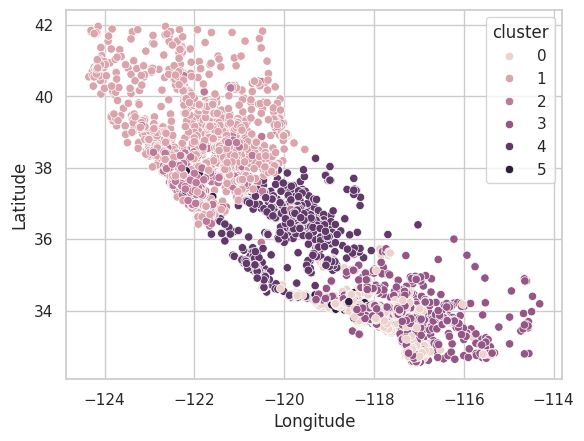

In [50]:
sns.scatterplot(
    data=X_train,
    x="Longitude",
    y="Latitude",
    hue="cluster",
)

Predict with the test set (Longitude, Latitude and Cluster)

<Axes: xlabel='Latitude', ylabel='Longitude'>

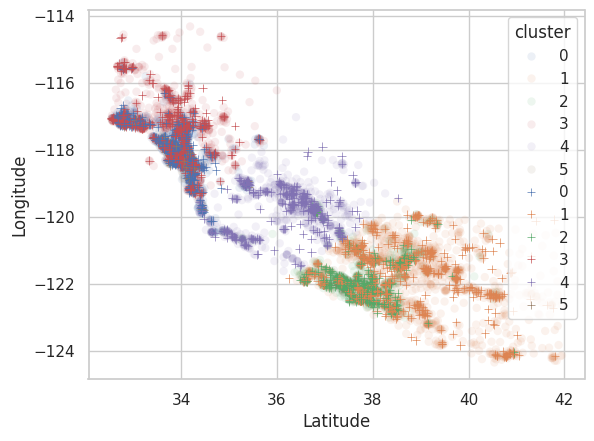

In [51]:
sns.scatterplot(data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")

Create a Scatterplot(Longitude, MedInc and cluster)

<Axes: xlabel='Longitude', ylabel='MedInc'>

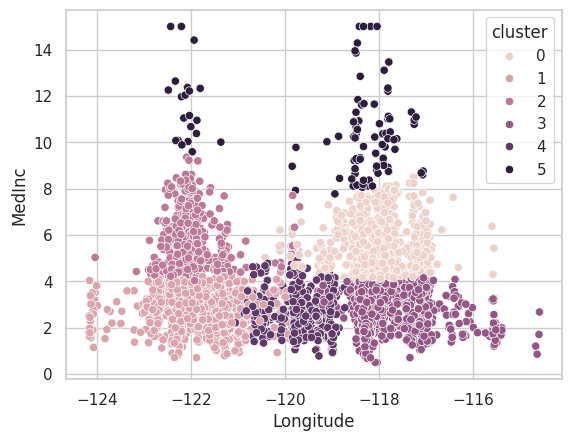

In [52]:
sns.scatterplot(
    data=X_test,
    x="Longitude",
    y="MedInc",
    hue="cluster",
)

Predict with the test set (Longitude, MedInc and Cluster)

<Axes: xlabel='Longitude', ylabel='MedInc'>

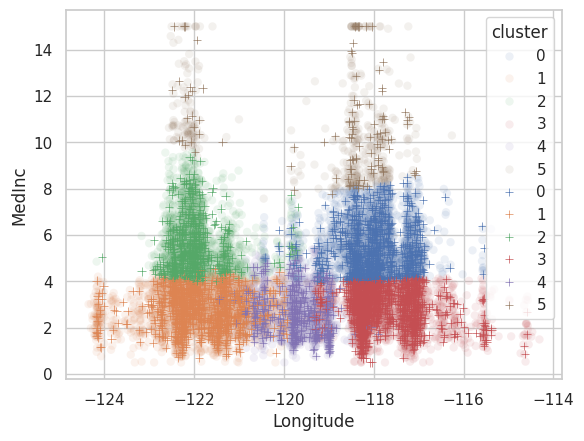

In [53]:
sns.scatterplot(data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

Create a Scatterplot(Latitude, MedInc and cluster)

<Axes: xlabel='Latitude', ylabel='MedInc'>

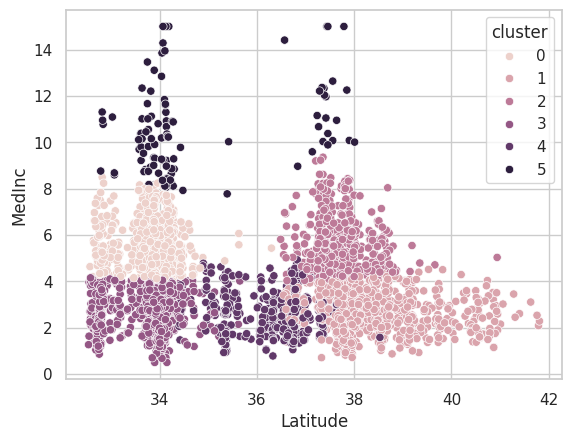

In [54]:
sns.scatterplot(
    data=X_test,
    x="Latitude",
    y="MedInc",
    hue="cluster",
)

Predict with the test set (Latitude, MedInc and Cluster)

<Axes: xlabel='Latitude', ylabel='MedInc'>

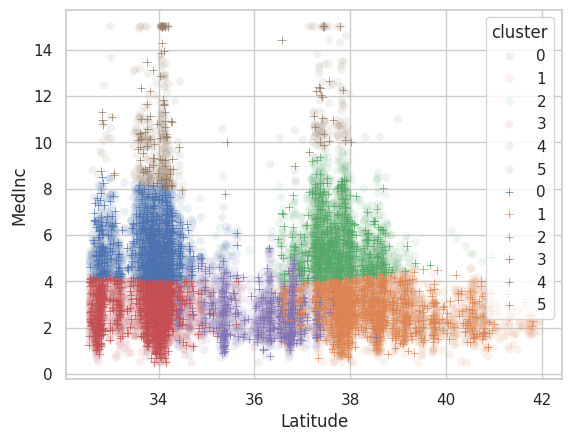

In [55]:
sns.scatterplot(data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

The prediction is successful

### 5. KNN

In [58]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

model = KMeans(n_clusters=6, random_state=42)
model.fit(X_train)

Y_train = model.predict(X_train)
Y_test  = model.predict(X_test)

def dist2centroids(model, X):
    # Aseguramos que sea un array de NumPy
    if hasattr(X, "to_numpy"):
        X = X.to_numpy()
    return np.linalg.norm(X[:, None, :] - model.cluster_centers_[None, :, :], axis=2)

X_train_dist = dist2centroids(model, X_train)
X_test_dist  = dist2centroids(model, X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_dist, Y_train)


print("kNN on distance-to-centroids accuracy:", knn.score(X_test_dist, Y_test))



kNN on distance-to-centroids accuracy: 0.999031007751938


### 6. Saving the model

In [59]:
import pickle

with open("../models/kmeans_model.pkl", "wb") as f:
    pickle.dump(model, f)